In [17]:
import numpy as np 
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sbn

# Pathway Reporter cross-correllation 

See if there are any leader-follower behavior 


In [18]:
clover = pd.read_csv('../data/output_abs_sb_mscarlet/output_abs_sb_mscarlet/clover/clover_all_cell.csv')
time = clover.columns[1:-3]
clo_ren = {x:f'clo_{x}' for x in clover.columns[1:-3]}
clover = clover.rename(clo_ren, axis=1)
clo_sel = [x for x in clover.columns[1:-3]]
mscarlet = pd.read_csv('../data/output_abs_sb_mscarlet/output_abs_sb_mscarlet/mscarlet/mscarlet_all_cell.csv')
msc_ren = {x:f'msc_{x}' for x in mscarlet.columns[1:-3]}
mscarlet = mscarlet.rename(msc_ren, axis=1)
msc_sel = [x for x in mscarlet.columns[1:-3]]
dat = clover.merge(mscarlet, on=['track_index','cell__treatment'])
dat.head()

,track_index,clo_0.0,clo_0.2,clo_0.5,clo_0.8,clo_1.0,clo_1.2,clo_1.5,clo_1.8,clo_2.0,...,msc_19.8,msc_20.0,msc_20.2,msc_20.5,msc_20.8,msc_21.0,msc_21.2,msc_21.5,site_y,median_y
0,5_1000022195_heya8_cdk2_mdmx__untreated,0.155885,0.161039,0.154921,0.155860,0.104046,0.100504,0.070314,0.056613,0.102267,...,0.725810,0.747852,0.685786,0.736157,0.706905,0.708613,0.675603,0.607260,5,0.611356
1,86_1000214349_heya8_cdk2_mdmx__untreated,0.688822,0.682840,0.683975,0.573425,0.539346,0.437008,0.366279,0.327197,0.192908,...,0.653581,0.869607,0.676076,0.654738,0.649322,0.815396,0.729968,0.692926,86,0.579295
2,2_1000008156_heya8_cdk2_mdmx__untreated,0.221258,0.321133,0.343385,0.367101,0.410391,0.514663,0.551495,0.649356,0.762877,...,0.193381,0.194631,0.280427,0.172175,0.080358,0.306924,0.318046,0.193690,2,0.385374
3,79_1000179546_heya8_cdk2_mdmx__untreated,0.616528,0.649111,0.709588,0.725635,0.781404,0.805625,0.769464,0.801717,0.781286,...,0.153205,0.134019,0.234945,0.015158,0.173044,0.150206,0.106442,0.104672,79,0.318933
4,2_1000007033_heya8_cdk2_mdmx__untreated,0.727552,0.677675,0.564581,0.701329,0.794484,0.754134,0.708484,0.740395,0.758439,...,0.238812,0.236626,0.296743,0.280049,0.272331,0.331154,0.244888,0.336616,2,0.313539


In [19]:
cc = [] 
for i, row in dat.iterrows(): cc.append( np.correlate(row[clo_sel].values, row[msc_sel].values, mode='full') )
cc = np.array(cc)
cc = cc.astype(np.float)

# Is there an overall increased cross correllation? 

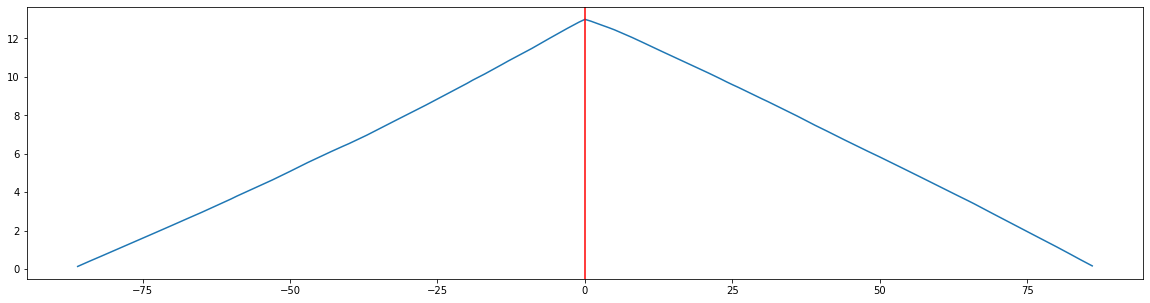

In [20]:
shift = np.concatenate((np.arange(-86,1,1),np.arange(1,87,1)))
plt.figure(figsize=(20,5))
plt.plot(shift, cc.mean(axis=0))
plt.axvline(0, c='r')
plt.show()

# Does it differ by perturbation type? 

In [21]:
res = pd.DataFrame(cc, columns=shift)
res = res.assign(cell__treatment=dat.cell__treatment)
res.head()

,-86,-85,-84,-83,-82,-81,-80,-79,-78,-77,...,78,79,80,81,82,83,84,85,86,cell__treatment
0,0.094663,0.203109,0.313339,0.423624,0.506857,0.576739,0.635570,0.681209,0.752478,0.853902,...,3.958550,3.471700,2.976412,2.521369,2.116477,1.672456,1.205380,0.775411,0.365824,heya8_cdk2_mdmx__untreated
1,0.477303,0.975976,1.534058,1.900673,2.244400,2.520986,2.893405,3.082505,3.092818,3.107907,...,1.083457,0.922706,0.765841,0.592572,0.472472,0.404120,0.295385,0.206182,0.095565,heya8_cdk2_mdmx__untreated
2,0.042855,0.132570,0.236555,0.296659,0.365538,0.487812,0.618204,0.756905,0.911353,1.094441,...,2.771965,2.519671,2.218857,2.033748,1.736884,1.368771,1.023691,0.688638,0.333594,heya8_cdk2_mdmx__untreated
3,0.064533,0.133568,0.235973,0.355671,0.387284,0.553975,0.655120,0.781210,0.881533,1.004725,...,0.990202,0.908446,0.815480,0.719655,0.623946,0.528537,0.259360,0.181167,0.100285,heya8_cdk2_mdmx__untreated
4,0.244906,0.406285,0.596933,0.796888,1.014449,1.240092,1.408619,1.586871,1.798106,1.980189,...,1.064142,0.909144,0.811123,0.728201,0.632368,0.547464,0.461995,0.319418,0.160645,heya8_cdk2_mdmx__untreated


In [23]:
shift

array([-86, -85, -84, -83, -82, -81, -80, -79, -78, -77, -76, -75, -74,
       -73, -72, -71, -70, -69, -68, -67, -66, -65, -64, -63, -62, -61,
       -60, -59, -58, -57, -56, -55, -54, -53, -52, -51, -50, -49, -48,
       -47, -46, -45, -44, -43, -42, -41, -40, -39, -38, -37, -36, -35,
       -34, -33, -32, -31, -30, -29, -28, -27, -26, -25, -24, -23, -22,
       -21, -20, -19, -18, -17, -16, -15, -14, -13, -12, -11, -10,  -9,
        -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,   3,   4,
         5,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,  16,  17,
        18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,  29,  30,
        31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,
        44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,
        57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,
        70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,
        83,  84,  85,  86])

[0.09466290514738261,
 0.20310944798885433,
 0.3133386843517491,
 0.42362357424322516,
 0.5068573159023794,
 0.5767390536872936,
 0.6355701392583838,
 0.6812090327442891,
 0.7524778014499691,
 0.853902361522959,
 0.9540012198803529,
 1.090768929645381,
 1.2785081105361467,
 1.4830683194285104,
 1.6755225689265336,
 1.8626920151067092,
 2.034278471420959,
 2.1847587175744714,
 2.3356259097932477,
 2.4955534409884086,
 2.651404390560565,
 2.810019006286552,
 3.0321043335580042,
 3.211814351922089,
 3.371315562414579,
 3.4323675363709008,
 3.525555637734939,
 3.5667178754359927,
 3.6533083457354047,
 3.7946442594067014,
 3.926145251096042,
 4.0318271820519245,
 4.136188858753807,
 4.193396473138069,
 4.277505234103796,
 4.332658209556959,
 4.364576014484456,
 4.406225318997224,
 4.489067955943919,
 4.581349453597337,
 4.7258936455746525,
 4.893406547531541,
 5.082461696331147,
 5.261541029448361,
 5.45152043071132,
 5.702136987657979,
 5.942790283956952,
 6.232879924763982,
 6.60321842266

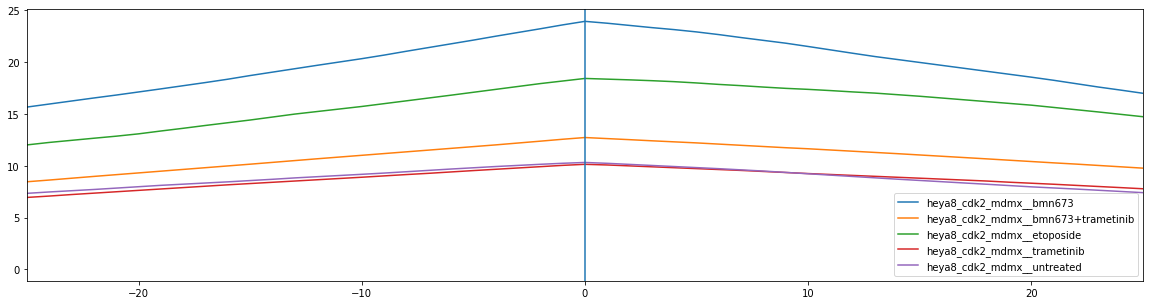

In [36]:
stats = res.groupby('cell__treatment').mean()#.reset_index()

plt.figure(figsize=(20,5))
for i,row in stats.iterrows(): 
    plt.plot(shift, row[shift], label=i)
plt.axvline(0)
plt.xlim(-25,25)
plt.legend()
plt.show()


# what is the max of each time series? 

In [37]:
#res = res.fillna(0)
res = res.assign(max_cc=[max(x) for x in res[shift].values])
res.head()

,-86,-85,-84,-83,-82,-81,-80,-79,-78,-77,...,79,80,81,82,83,84,85,86,cell__treatment,max_cc
0,0.094663,0.203109,0.313339,0.423624,0.506857,0.576739,0.635570,0.681209,0.752478,0.853902,...,3.471700,2.976412,2.521369,2.116477,1.672456,1.205380,0.775411,0.365824,heya8_cdk2_mdmx__untreated,25.726257
1,0.477303,0.975976,1.534058,1.900673,2.244400,2.520986,2.893405,3.082505,3.092818,3.107907,...,0.922706,0.765841,0.592572,0.472472,0.404120,0.295385,0.206182,0.095565,heya8_cdk2_mdmx__untreated,26.785598
2,0.042855,0.132570,0.236555,0.296659,0.365538,0.487812,0.618204,0.756905,0.911353,1.094441,...,2.519671,2.218857,2.033748,1.736884,1.368771,1.023691,0.688638,0.333594,heya8_cdk2_mdmx__untreated,12.368989
3,0.064533,0.133568,0.235973,0.355671,0.387284,0.553975,0.655120,0.781210,0.881533,1.004725,...,0.908446,0.815480,0.719655,0.623946,0.528537,0.259360,0.181167,0.100285,heya8_cdk2_mdmx__untreated,19.571383
4,0.244906,0.406285,0.596933,0.796888,1.014449,1.240092,1.408619,1.586871,1.798106,1.980189,...,0.909144,0.811123,0.728201,0.632368,0.547464,0.461995,0.319418,0.160645,heya8_cdk2_mdmx__untreated,19.607507


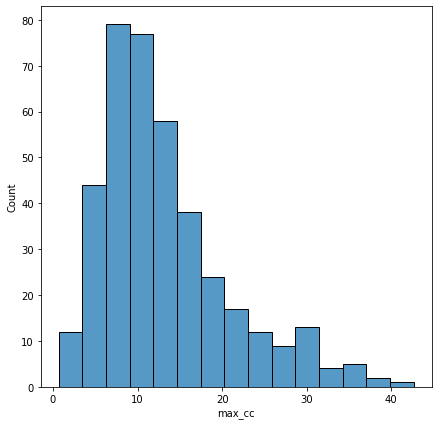

In [38]:
plt.figure(figsize=(7,7))
sbn.histplot(x='max_cc', data=res, bins=15)
plt.show()

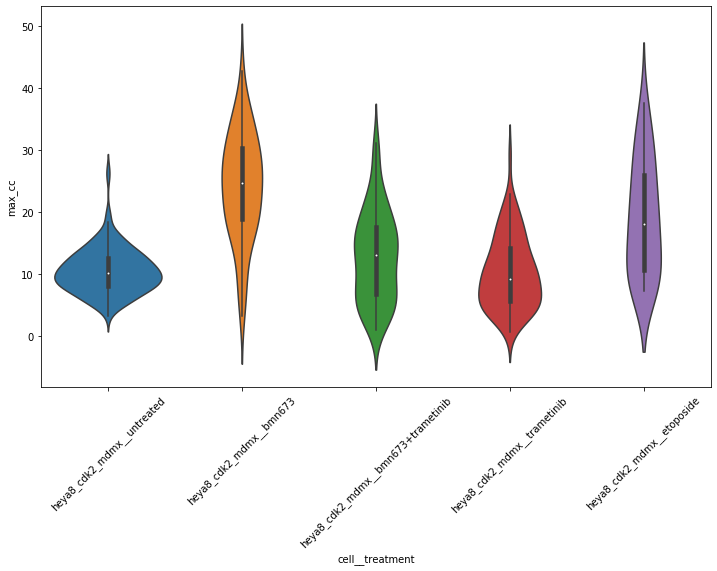

In [39]:
plt.figure(figsize=(12,7))
sbn.violinplot(y='max_cc', data=res, x='cell__treatment')
plt.xticks(rotation=45)
plt.show()

In [40]:
res.groupby('cell__treatment')['max_cc'].agg(['mean','std','count'])

,mean,std,count
cell__treatment,,,
heya8_cdk2_mdmx__bmn673,24.126364,8.487238,53
heya8_cdk2_mdmx__bmn673+trametinib,12.865635,7.265543,63
heya8_cdk2_mdmx__etoposide,18.963160,9.183491,24
heya8_cdk2_mdmx__trametinib,10.316434,5.752591,80
heya8_cdk2_mdmx__untreated,10.570188,3.600869,175


# Side bar: how does this change if we look at `no shift` correllation? 

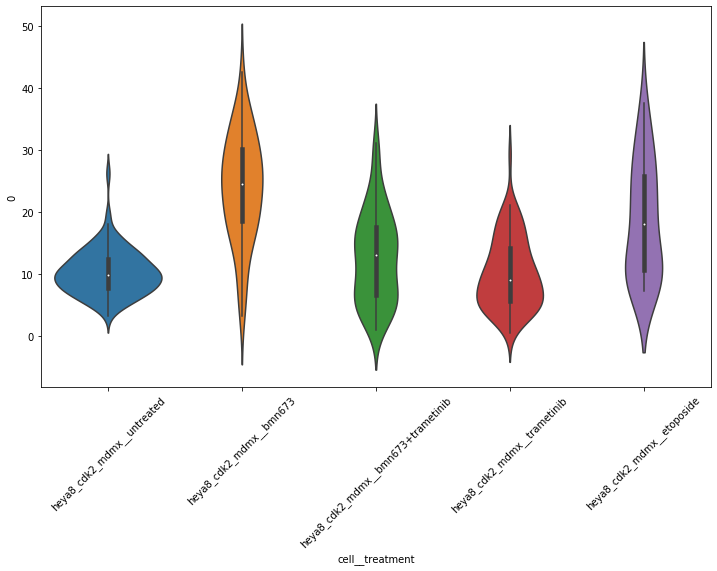

In [41]:
plt.figure(figsize=(12,7))
sbn.violinplot(y=0, data=res, x='cell__treatment')
plt.xticks(rotation=45)
plt.show()

# where does the maximum shift occur?

In [42]:
res = res.assign(max_idx=[shift[np.argmax(x)] for x in res[shift].values])
res.head()

,-86,-85,-84,-83,-82,-81,-80,-79,-78,-77,...,80,81,82,83,84,85,86,cell__treatment,max_cc,max_idx
0,0.094663,0.203109,0.313339,0.423624,0.506857,0.576739,0.635570,0.681209,0.752478,0.853902,...,2.976412,2.521369,2.116477,1.672456,1.205380,0.775411,0.365824,heya8_cdk2_mdmx__untreated,25.726257,0
1,0.477303,0.975976,1.534058,1.900673,2.244400,2.520986,2.893405,3.082505,3.092818,3.107907,...,0.765841,0.592572,0.472472,0.404120,0.295385,0.206182,0.095565,heya8_cdk2_mdmx__untreated,26.785598,0
2,0.042855,0.132570,0.236555,0.296659,0.365538,0.487812,0.618204,0.756905,0.911353,1.094441,...,2.218857,2.033748,1.736884,1.368771,1.023691,0.688638,0.333594,heya8_cdk2_mdmx__untreated,12.368989,16
3,0.064533,0.133568,0.235973,0.355671,0.387284,0.553975,0.655120,0.781210,0.881533,1.004725,...,0.815480,0.719655,0.623946,0.528537,0.259360,0.181167,0.100285,heya8_cdk2_mdmx__untreated,19.571383,0
4,0.244906,0.406285,0.596933,0.796888,1.014449,1.240092,1.408619,1.586871,1.798106,1.980189,...,0.811123,0.728201,0.632368,0.547464,0.461995,0.319418,0.160645,heya8_cdk2_mdmx__untreated,19.607507,0


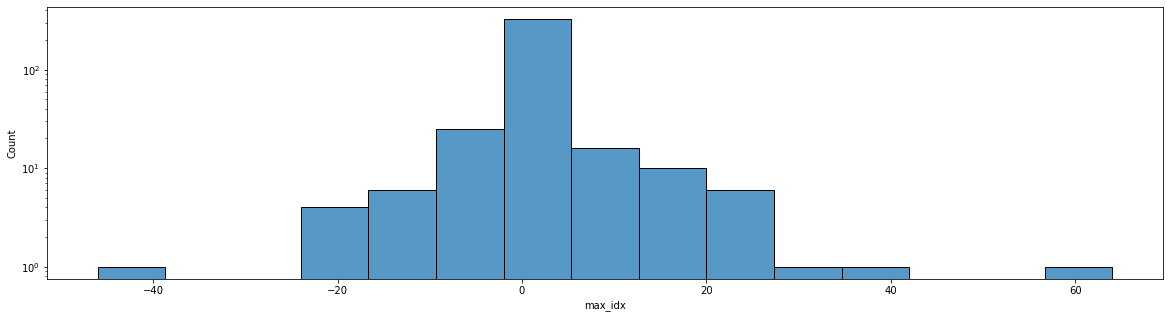

In [43]:
f, ax = plt.subplots(1,1,figsize=(20,5))
sbn.histplot(x='max_idx', data=res, bins=15)
ax.set_yscale('log')
plt.show()

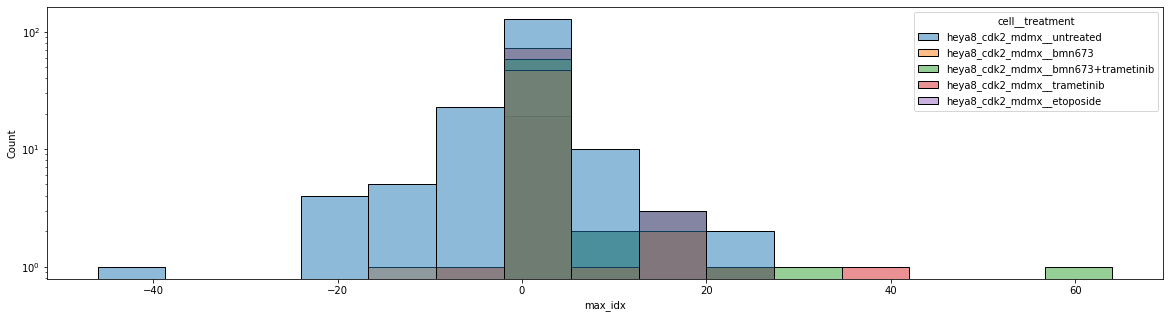

In [44]:
f, ax = plt.subplots(1,1,figsize=(20,5))
sbn.histplot(x='max_idx', data=res, bins=15, hue='cell__treatment')
ax.set_yscale('log')
plt.show()

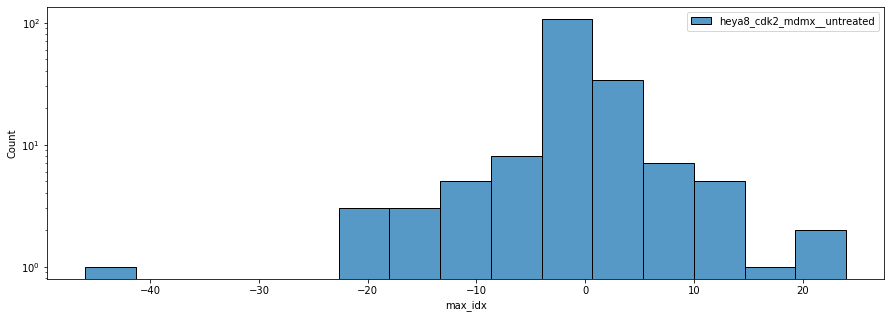

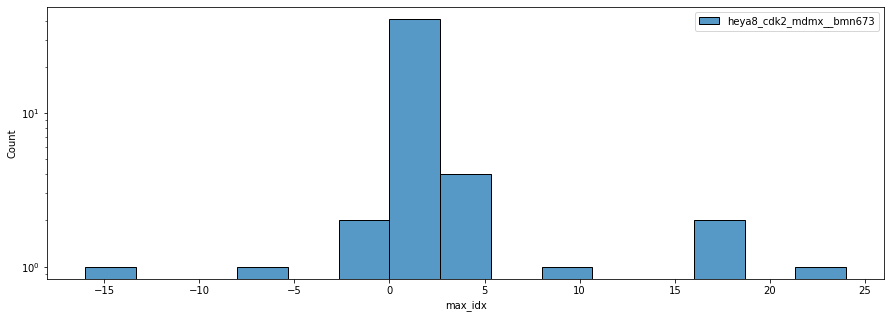

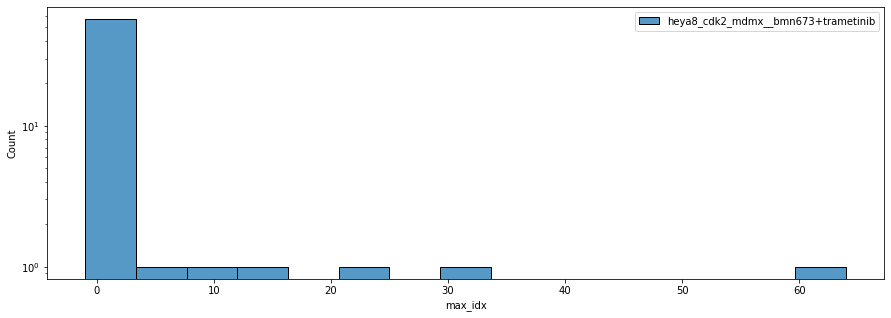

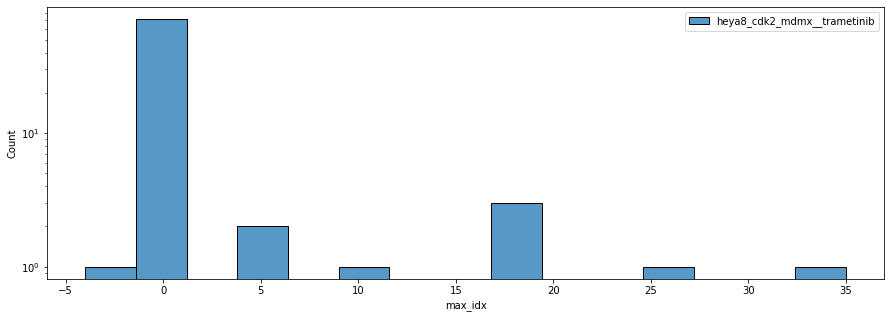

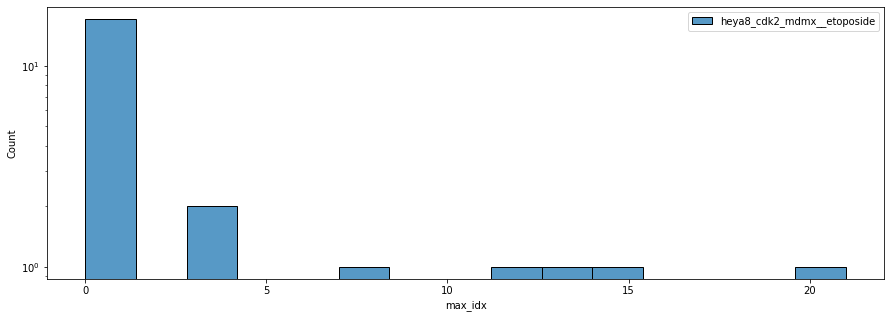

In [45]:
for ct in res.cell__treatment.unique(): 
    temp = res[res.cell__treatment == ct]
    f, ax = plt.subplots(1,1,figsize=(15,5))
    sbn.histplot(x='max_idx', data=temp, bins=15, label=ct)
    ax.set_yscale('log')
    plt.legend()
    plt.show()

# Seems to be a grouping with `max_idx` around `10-25`

In [46]:
val = ((res.max_idx > 10) & (res.max_idx < 25)).values
val.sum()

21

In [47]:
lagged = dat.iloc[val]

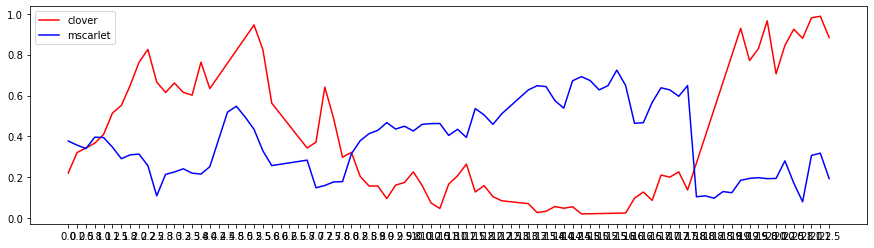

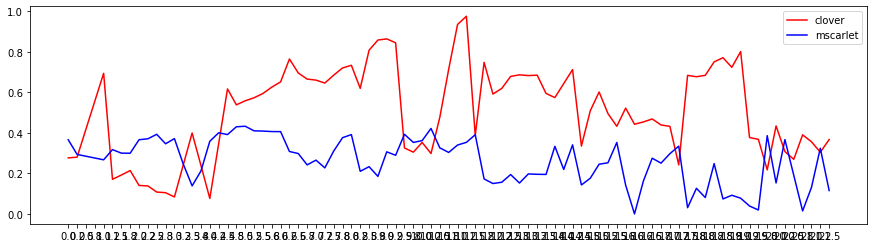

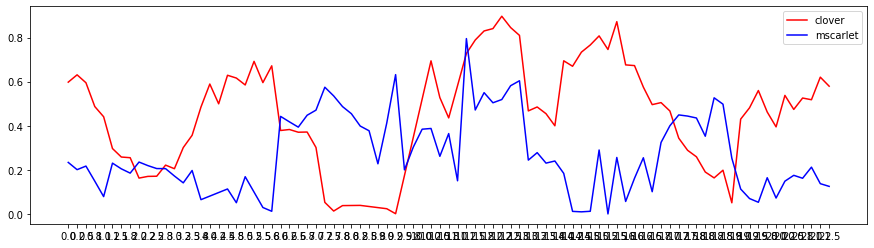

In [50]:
for i,row in lagged.iterrows():
    plt.figure(figsize=(15,4))
    plt.plot(time, row[clo_sel], 'r-', label='clover')
    plt.plot(time, row[msc_sel], 'b-', label='mscarlet')
    plt.legend()
    plt.show()
    if i>10: break

# what about `max_cc` vs `max_idx`

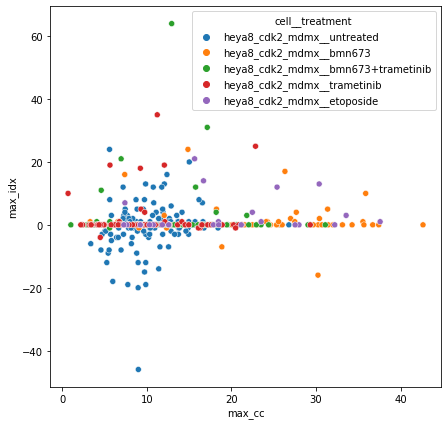

In [51]:
plt.figure(figsize=(7,7))
sbn.scatterplot(x='max_cc', y='max_idx', data=res, hue='cell__treatment')
plt.show()

# can we compare time series by the lag-lead order? e.g., does pathway A lag or lead - binarize via `max_idx` ? 

In [52]:
res = res.assign(pos_idx=lambda x: x.max_idx > 0, neg_idx=lambda x: x.max_idx < 0)

In [60]:
temp = res.groupby('cell__treatment').mean().reset_index()
temp.head()

,cell__treatment,-86,-85,-84,-83,-82,-81,-80,-79,-78,...,81,82,83,84,85,86,max_cc,max_idx,pos_idx,neg_idx
0,heya8_cdk2_mdmx__bmn673,0.231271,0.475224,0.739307,0.986369,1.238248,1.489592,1.725627,1.978413,2.209421,...,1.631508,1.343992,1.060263,0.796795,0.532577,0.264489,24.126364,1.320755,0.320755,0.075472
1,heya8_cdk2_mdmx__bmn673+trametinib,0.116834,0.234707,0.356215,0.468277,0.586285,0.706194,0.829024,0.955925,1.074645,...,1.107930,0.930562,0.754230,0.571249,0.378240,0.188371,12.865635,2.349206,0.158730,0.015873
2,heya8_cdk2_mdmx__etoposide,0.143856,0.291447,0.430038,0.586954,0.754722,0.916506,1.071384,1.225890,1.388834,...,1.617248,1.337754,1.053803,0.773462,0.512457,0.252310,18.963160,3.208333,0.416667,0.000000
3,heya8_cdk2_mdmx__trametinib,0.098192,0.197528,0.294249,0.388927,0.482535,0.573506,0.663575,0.757423,0.850659,...,0.804465,0.671369,0.532516,0.394380,0.263955,0.135748,10.316434,1.637500,0.137500,0.050000
4,heya8_cdk2_mdmx__untreated,0.125637,0.256416,0.368792,0.480751,0.598740,0.718121,0.834999,0.953441,1.077504,...,0.741593,0.618562,0.490448,0.365326,0.244107,0.123288,10.570188,-0.428571,0.280000,0.297143


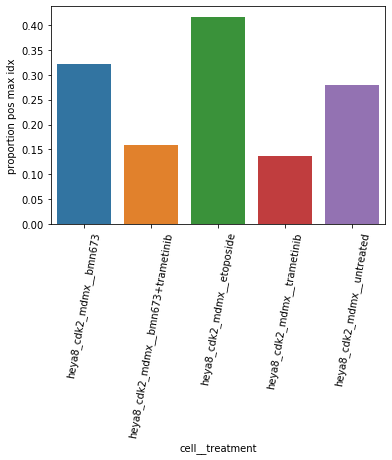

In [67]:
# proportion of positive max_idx
plt.figure()
sbn.barplot(x='cell__treatment', y='pos_idx', data=temp)
plt.ylabel('proportion pos max idx')
plt.xticks(rotation=80)
plt.show()

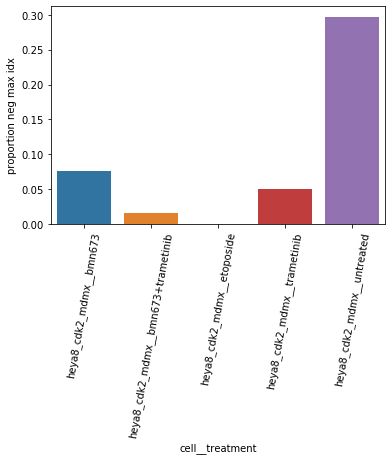

In [69]:
# proportion of positive max_idx
plt.figure()
sbn.barplot(x='cell__treatment', y='neg_idx', data=temp)
plt.ylabel('proportion neg max idx')
plt.xticks(rotation=80)
plt.show()